In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from src.data.read_dataset import get_processed_dataset

In [2]:
it = gpd.read_file('../../data/raw/regions_it.geojson').to_crs("EPSG:3395")

C:\Users\agostine\anaconda3\envs\coronavirus\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [3]:
df = get_processed_dataset('dpc_regioni')

In [4]:
it_merged = it.merge(df[df.data == max(df.data)], how = 'right', left_on = 'reg_istat_code_num', right_on = 'codice_regione')

# Distribuzione totale casi per regione

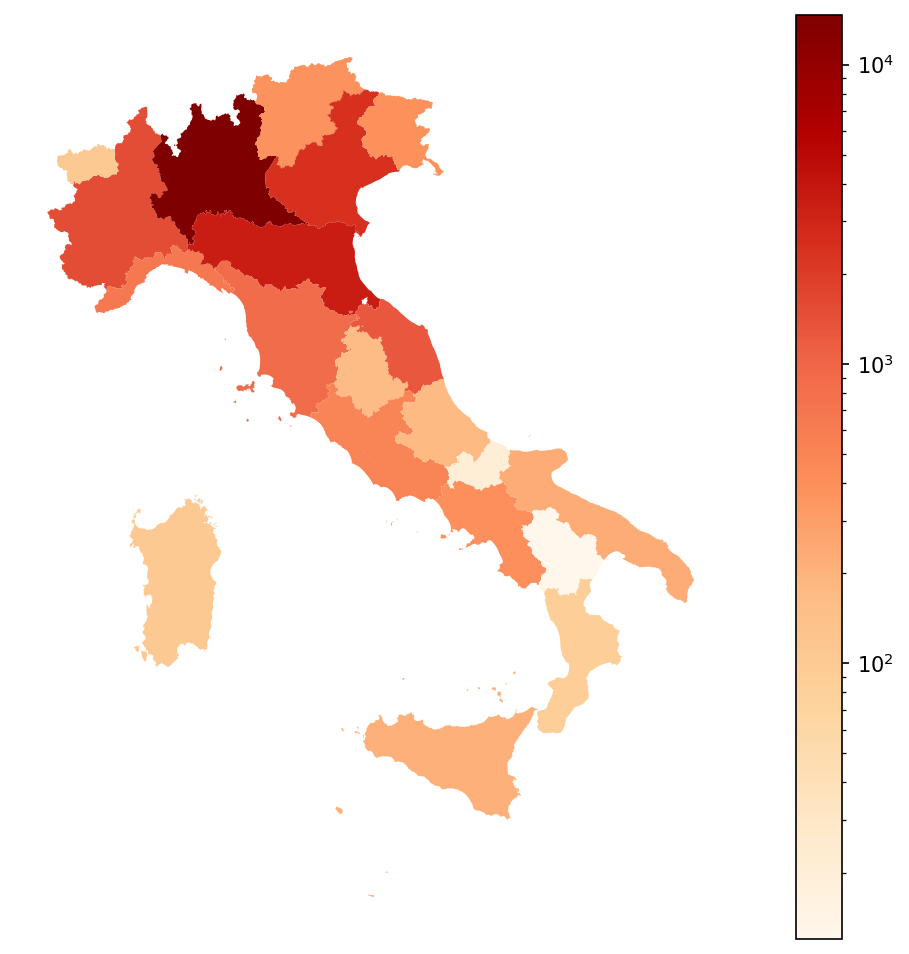

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
it_merged.plot(ax=ax, column='totale_casi', cmap='OrRd', legend=True, norm=colors.LogNorm(vmin=min(it_merged.totale_casi), vmax=max(it_merged.totale_casi)))
ax.set_axis_off()

# Numero pazienti in terapia intensiva

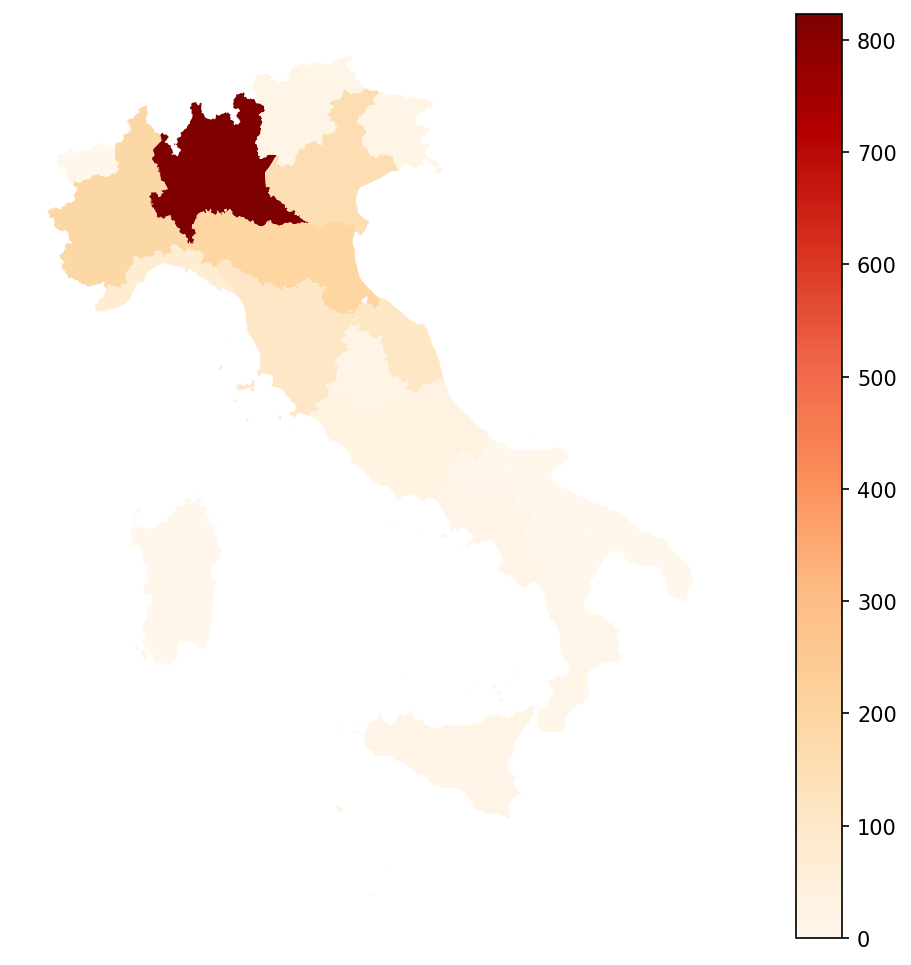

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
it_merged.plot(ax=ax, column='terapia_intensiva', cmap='OrRd', legend=True)
ax.set_axis_off()

# Numero pazienti deceduti

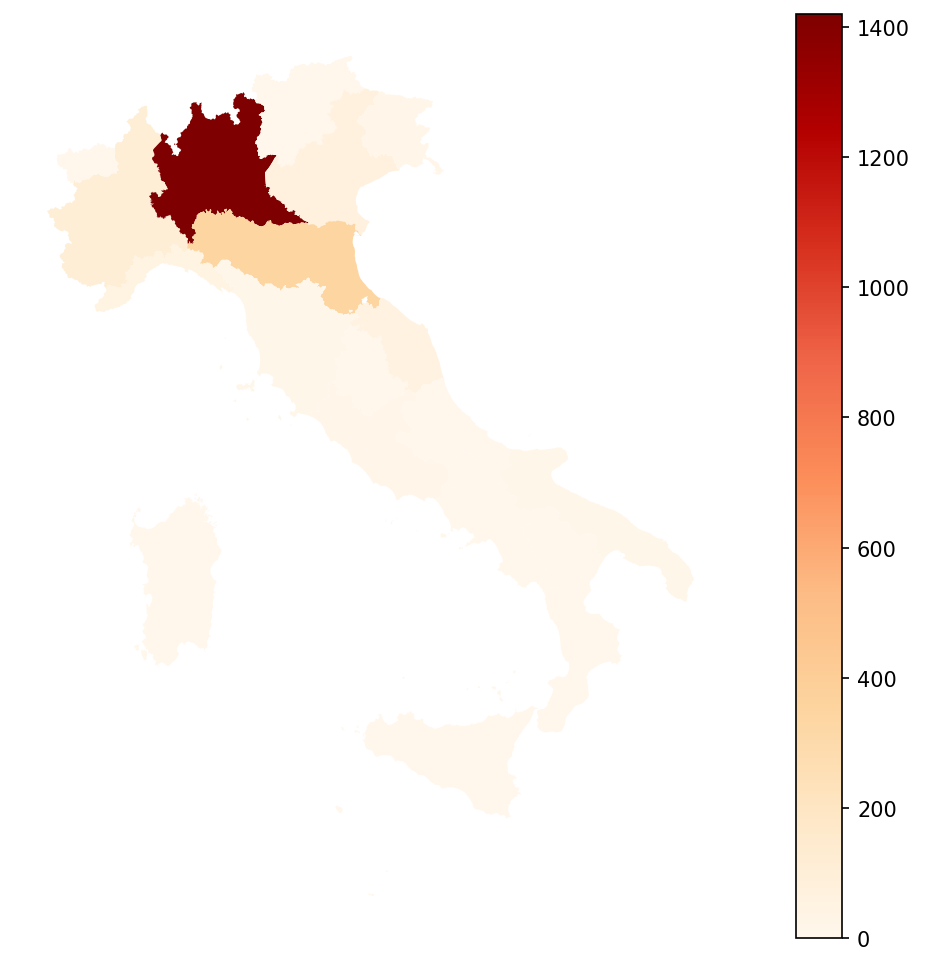

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
it_merged.plot(ax=ax, column='deceduti', cmap='OrRd', legend=True)
ax.set_axis_off()

# Distribuzione del tempo di raddoppio

In [8]:
from scipy.optimize import curve_fit
from tabulate import tabulate
from IPython.display import HTML
import numpy as np
import pandas as pd

fits = []
for region in df.codice_regione.unique():
    region_df = df[(df.codice_regione == region) & (df.totale_casi>10)]
    ydata = region_df.totale_casi
    xdata = np.arange(len(ydata))
    try:
        popt, pcov = curve_fit(f=lambda t,a,b: a*2**(t/b),xdata=xdata,ydata=ydata)
        if popt[1] > 0:
            fits.append([region_df.regione.iloc[0], region_df.codice_regione.iloc[0], popt[1]])
    except ValueError:
        continue
        
cdf = pd.DataFrame(fits, columns=['Regione', 'Codice Regione', 'Doubling Rate']).set_index('Codice Regione').sort_values('Doubling Rate')
it_merged = it.merge(cdf, how = 'right', left_on = 'reg_istat_code_num', right_index = True)

C:\Users\agostine\anaconda3\envs\coronavirus\lib\site-packages\scipy\optimize\minpack.py:807: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


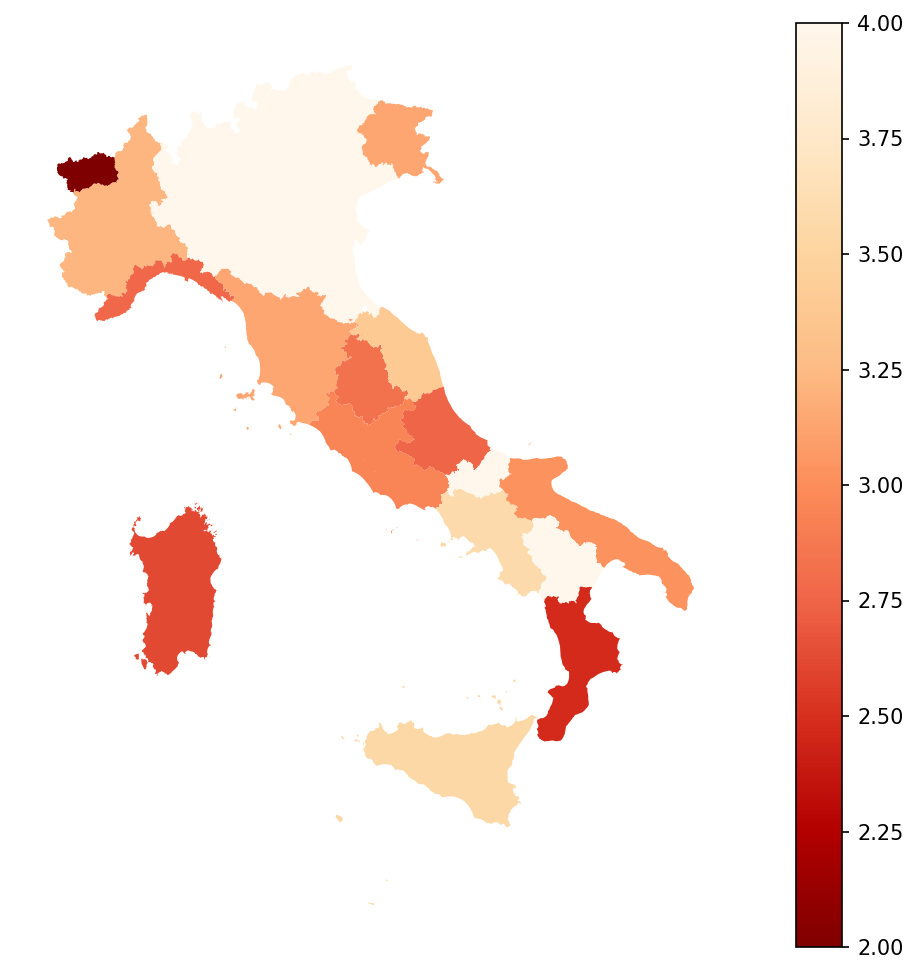

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
it_merged.plot(ax=ax, column='Doubling Rate', cmap='OrRd_r', legend=True, vmin=2, vmax=4)
ax.set_axis_off()

In [10]:
cdf

,Regione,Doubling Rate
Codice Regione,,
2,Valle d'Aosta,1.890145
18,Calabria,2.474305
20,Sardegna,2.619014
13,Abruzzo,2.754305
7,Liguria,2.766760
10,Umbria,2.833919
12,Lazio,2.947183
16,Puglia,3.024451
9,Toscana,3.133677
